# Hyperparamerter analysis

This notebook is driven by the question 'What are the best hyperparameters for the model?'.

In [11]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
model_folder = ['1_ccff', '2_cff', '3_cccff', '4_cf', '5_ccf', '6_cccf', '7_ccccff', '8_ccccf', '9_cccccf', '10_cccccff']
model_folder = model_folder[5]
main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'

model_name = model_folder.split('_')[-1]
df = pd.read_csv(os.path.join(main_path, model_folder, model_name+'_Hyperparameter.csv'))
df.describe()

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Time
count,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,1.000000e-03,181.082353,4.152941,12.035294,118.235294,77.163772,0.764301,51729.411765,1012.285621
std,6.543820e-19,55.888327,0.994100,6.437330,64.522172,27.073916,0.370347,32174.149722,727.920283
min,1.000000e-03,65.000000,3.000000,2.000000,13.000000,20.649998,0.000000,0.000000,2.616498
25%,1.000000e-03,142.000000,3.000000,8.000000,67.000000,89.360011,0.924428,50000.000000,533.382112
50%,1.000000e-03,200.000000,5.000000,11.000000,123.000000,90.110010,0.944862,50000.000000,990.833534
75%,1.000000e-03,226.000000,5.000000,16.000000,176.000000,90.400010,0.948695,50000.000000,1425.963100
max,1.000000e-03,255.000000,5.000000,25.000000,248.000000,90.970004,0.952376,100000.000000,3381.544164


In [7]:
df.tail()

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Early_Stopped,Time,Title
55,0.001,202,5,9,100,89.710009,0.947991,100000,False,3020.447597,Optimizing_Run_1
56,0.001,235,5,5,157,21.219999,0.000000,0,True,13.468626,Optimizing_Run_1
57,0.001,226,5,2,73,21.139999,0.000000,0,True,69.388353,Optimizing_Run_1
58,0.001,228,3,2,125,21.149999,0.000000,0,True,64.302668,Optimizing_Run_1
59,0.001,235,5,9,156,89.520007,0.951053,100000,False,3381.544164,Optimizing_Run_1


# Hyperparameter ordered by best auc-value

In [8]:
df.sort_values(by='Auc', ascending=False).head(10)

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Early_Stopped,Time,Title
32,0.001,180,3,9,138,90.550005,0.952376,50000,False,672.932741,Random_Plotting
26,0.001,242,3,13,193,90.600014,0.951851,50000,False,1120.017893,Random_Plotting
15,0.001,195,5,10,71,90.840006,0.951616,50000,False,1571.298663,Random_Plotting
59,0.001,235,5,9,156,89.520007,0.951053,100000,False,3381.544164,Optimizing_Run_1
54,0.001,220,5,7,147,89.780009,0.951045,100000,False,2119.497280,Optimizing_Run_1
51,0.001,232,5,5,178,89.570010,0.950593,100000,False,1627.055841,Optimizing_Run_1
31,0.001,186,5,13,82,90.670007,0.950400,50000,False,934.124673,Random_Plotting
29,0.001,200,3,12,80,90.350008,0.950248,50000,False,993.768674,Random_Plotting
7,0.001,157,5,14,95,90.490013,0.949862,50000,False,1495.397059,Random_Plotting
34,0.001,121,3,12,44,90.360010,0.949142,50000,False,650.324755,Random_Plotting


In [10]:
df[df['Title']=='Optimizing_Run_1'].sort_values(by='Auc', ascending=False).head(15)

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Early_Stopped,Time,Title
59,0.001,235,5,9,156,89.520007,0.951053,100000,False,3381.544164,Optimizing_Run_1
54,0.001,220,5,7,147,89.780009,0.951045,100000,False,2119.497280,Optimizing_Run_1
51,0.001,232,5,5,178,89.570010,0.950593,100000,False,1627.055841,Optimizing_Run_1
55,0.001,202,5,9,100,89.710009,0.947991,100000,False,3020.447597,Optimizing_Run_1
53,0.001,253,5,2,166,89.110005,0.940787,100000,False,1198.230597,Optimizing_Run_1
50,0.001,226,5,8,180,21.439999,0.000000,0,True,13.148998,Optimizing_Run_1
52,0.001,237,5,12,182,21.249998,0.000000,0,True,8.455956,Optimizing_Run_1
56,0.001,235,5,5,157,21.219999,0.000000,0,True,13.468626,Optimizing_Run_1
57,0.001,226,5,2,73,21.139999,0.000000,0,True,69.388353,Optimizing_Run_1
58,0.001,228,3,2,125,21.149999,0.000000,0,True,64.302668,Optimizing_Run_1


# Scattermatrix to compare every variable

In [6]:
def plotScattermatrix(df):
    plt.style.use('seaborn-ticks')
    pd.scatter_matrix(df[df['Auc']>0.8][['Hidden_Nodes', 'Depth', 'Patch_Size', 'Batch_Size', 'Accuracy', 'Auc']], alpha=1.0, figsize=(10, 10), c='b', diagonal='kde')
    plt.show()
    
def plotCorrelation(df):
    plt.style.use('seaborn-white')
    f, ax = plt.subplots(figsize=(12, 3))
    corr = df[['Hidden_Nodes', 'Depth', 'Patch_Size', 'Batch_Size', 'Accuracy', 'Auc']].corr()
    sns.heatmap(corr.tail(2), mask=np.zeros_like(corr.tail(2), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
    plt.show()

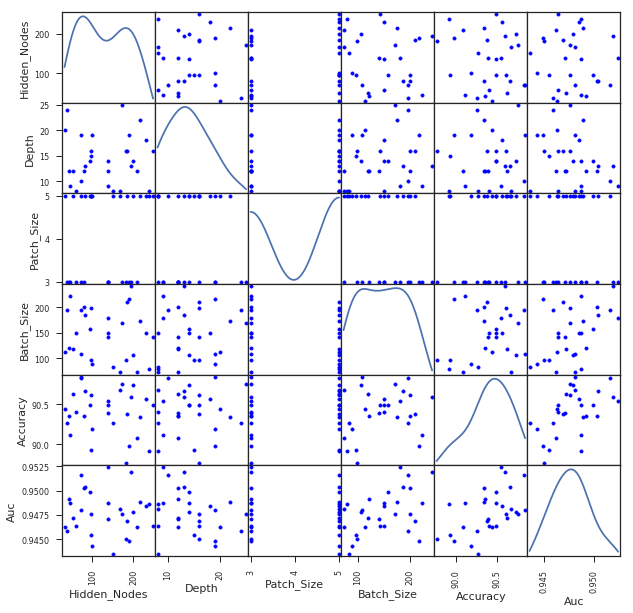

Correlation - All CNNs


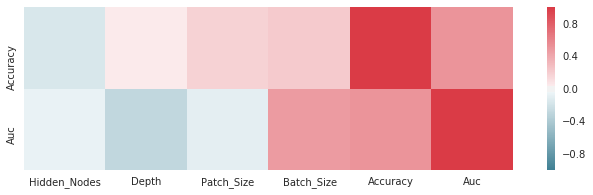

In [10]:
plotScattermatrix(df[df['Auc']>=0.94])
print('Correlation - All CNNs')
plotCorrelation(df[df['Auc']>=0.94])

In [11]:
for column in ['Patch_Size']:
    mean = df[df['Auc']>0.8].groupby(column)['Auc'].mean().sort_values(ascending=False)
    print(mean)

Patch_Size
3    0.940227
5    0.938716
Name: Auc, dtype: float64
